## Plotting flux vs energy

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [14]:
list_files = [glob.glob('proton/*.txt'), glob.glob('iron/*.txt')]
list_files

[['proton/p_DAMPE_SCIENCE2019_000.txt',
  'proton/p_AMS_PRL2015_ekin_000.txt',
  'proton/Proton-CALET-2022_000.txt',
  'proton/p_flux_CREAMIII_ApJ2017_000.txt'],
 ['iron/iron_CALET2021_000.txt',
  'iron/Fe_CREAMII_ApJ2009_000.txt',
  'iron/Fe_HESS_PRD2007_000.txt']]

In [15]:
particle = []
for files in list_files:
    part = []
    for file in files:
        f = open(file)
        lines = f.readlines()
        p = []
        for line in lines:
            if not line.startswith('#'):
                p.append([float(x) for x in line.split()])
        part.append(p)
    particle.append(part)

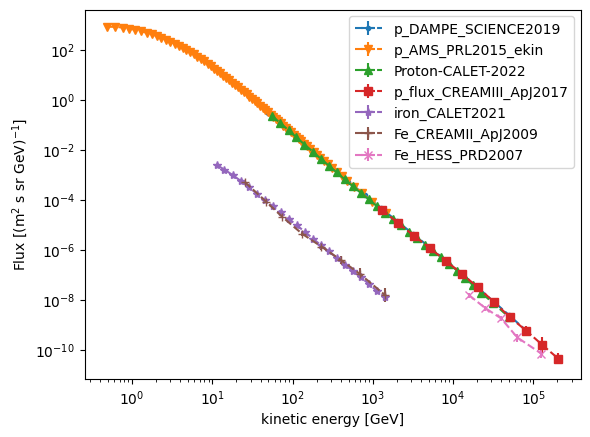

In [16]:
list_marker = [['.', 'v', '^', 's'], ['*', '+', 'x']]

fig, ax = plt.subplots()
for part, files, maker_array in zip(particle, list_files, list_marker):
    for array, title, marker in zip(part, files, maker_array):
        if title.startswith('proton'):
            ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[7:-8]))#[7:-8]
        else:
            ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[5:-8]))#[7:-8]
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('kinetic energy [GeV]')
ax.set_ylabel('Flux [(m$^{2}$ s sr GeV)$^{-1}$]')
ax.legend(loc='upper right', ncol=1,  bbox_to_anchor=(1.0,1.0))#(0.5, 1.3))
#ax.set_xlim(1e3,)
plt.savefig('flux.png')

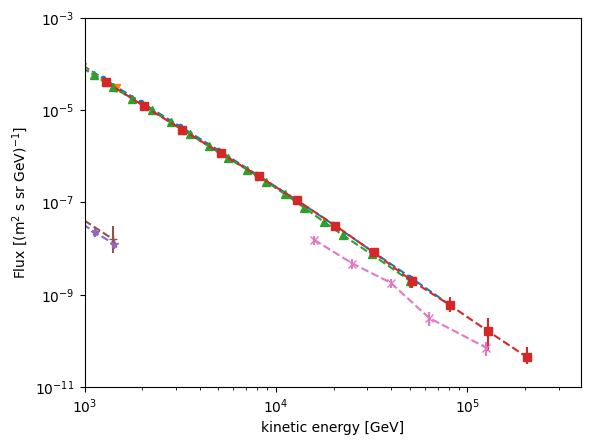

In [17]:
fig, ax = plt.subplots()
for part, files, maker_array in zip(particle, list_files, list_marker):
    for array, title, marker in zip(part, files, maker_array):
        if title.startswith('proton'):
            ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[7:-8]))#[7:-8]
        else:
            ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[5:-8]))#[7:-8]
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('kinetic energy [GeV]')
ax.set_ylabel('Flux [(m$^{2}$ s sr GeV)$^{-1}$]')
#ax.legend(loc='upper right', ncol=1,  bbox_to_anchor=(1.0,1.0))#(0.5, 1.3))
ax.set_xlim(1e3,)
ax.set_ylim(1e-11,1e-3)
plt.savefig('flux_zoom.png')

## Plot with zoom portion

In [18]:
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

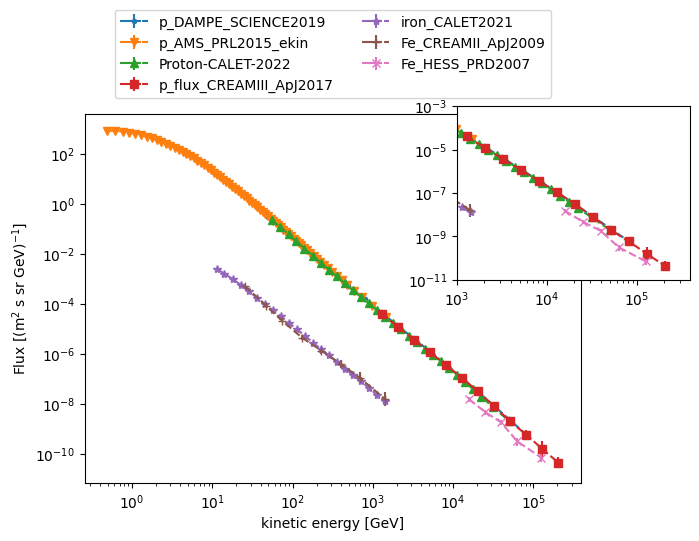

In [19]:
fig, ax = plt.subplots()
axins = ax.inset_axes([0.75, 0.55, 0.47, 0.47])

for part, files, maker_array in zip(particle, list_files, list_marker):
    for array, title, marker in zip(part, files, maker_array):
        if title.startswith('proton'):
            ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[7:-8]))#[7:-8]
        else:
            ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[5:-8]))#[7:-8]
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('kinetic energy [GeV]')
ax.set_ylabel('Flux [(m$^{2}$ s sr GeV)$^{-1}$]')
#ax.legend(loc='lower left', ncol=1)
ax.legend(loc='upper center', ncol=2,  bbox_to_anchor=(0.5, 1.3))

for part, files, maker_array in zip(particle, list_files, list_marker):
    for array, title, marker in zip(part, files, maker_array):
        if title.startswith('proton'):
            axins.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[7:-8]))#[7:-8]
        else:
            axins.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                        y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt=marker+'--', label=('%s') % (title[5:-8]))#[7:-8]

axins.set_yscale('log')
axins.set_xscale('log')
axins.set_xlim(1e3,)
axins.set_ylim(1e-11,1e-3)

#mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.savefig('flux_with_zoom.png')



# Interpolation 

In [20]:
from scipy.interpolate import interp1d

In [45]:
Xproton, Yproton, Xiron, Yiron = [], [], [], []
for part, files, maker_array in zip(particle, list_files, list_marker):
    for array, title, marker in zip(part, files, maker_array):
        for a in array:
            if a[0] > 1e2 and a[0] < 1e4:
                if title.startswith('proton'):
                    Xproton.append(a[0])
                    Yproton.append(a[3])
                else:
                    Xiron.append(a[0])
                    Yiron.append(a[3])


In [46]:
fproton = interp1d(Xproton, Yproton)
firon   = interp1d(Xiron,   Yiron)

In [113]:
fproton(1000), firon(1000), fproton(1000)/firon(1000)

(array(8.06732919e-05), array(3.40794232e-08), 2367.2141264658303)

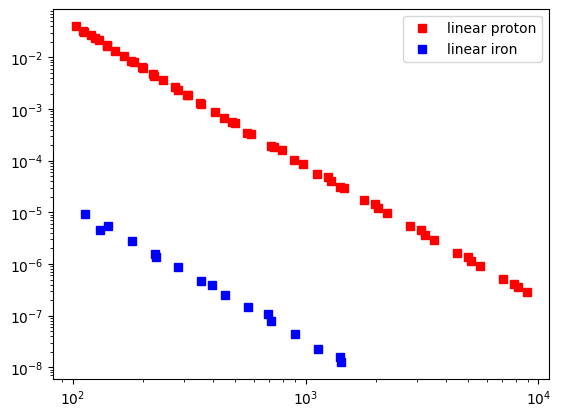

In [60]:
fig, ax = plt.subplots()
#ax.plot(Xproton, Yproton, 'o')
ax.plot(Xproton, fproton(Xproton), 'sr')
ax.plot(Xiron, firon(Xiron), 'sb')
plt.legend(['linear proton', 'linear iron'], loc='best')
ax.set_yscale('log')
ax.set_xscale('log')

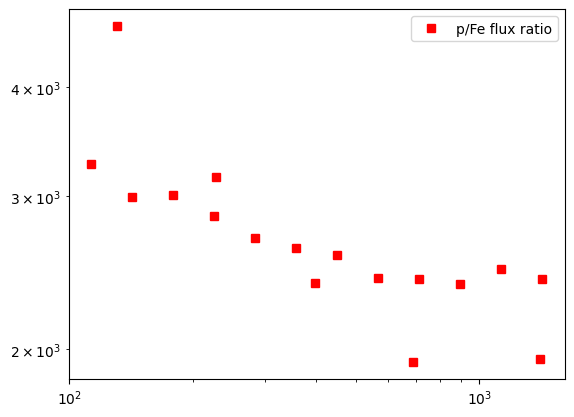

In [109]:
fig, ax = plt.subplots()
#ax.plot(Xproton, Yproton, 'o')
ax.plot(Xiron, fproton(Xiron)/firon(Xiron), 'sr')
plt.legend(['p/Fe flux ratio'], loc='best')
ax.set_yscale('log')
ax.set_xscale('log')